[Money Creation Examples](http://www.siebenbrunner.com/moneycreation/) > **Example 4**:
# Banking crises
In this example we revisit a situation from [Example 3](http://www.siebenbrunner.com/moneycreation/Ex3_Refinancing.html) where a a bank was holding a loan to an insolvent borrower. We now investigate what happens when the bank recognizes this loss.

We start by importing required utilities:

In [1]:
import os
import sys

base_path = os.path.realpath(os.getcwd()+"/../..")
sys.path.append(base_path)

from abcFinance import Ledger, Account, AccountSide

## Declaration of agents
The set of agents is similar to the set in [Example 3](http://www.siebenbrunner.com/moneycreation/Ex3_Refinancing.html). We omit the central bank because it will not make any booking statements in this example.

In [2]:
bank1 = Ledger(residual_account_name="Equity")
bank2 = Ledger(residual_account_name="Equity")
bank3 = Ledger(residual_account_name="Equity")
private_agentA = Ledger(residual_account_name="Equity")
private_agentB = Ledger(residual_account_name="Equity")

bank1.make_asset_accounts(['Loans'])
bank1.make_liability_accounts(['Interbank Deposits'])
bank1.make_flow_accounts(['Impairments'])
bank2.make_asset_accounts(['Reserves','Interbank Loans'])
bank2.make_liability_accounts(['Deposits'])
bank2.make_flow_accounts(['Impairments','Expenses'])
bank3.make_asset_accounts(['Reserves'])
bank3.make_flow_accounts(['Income'])

private_agentA.make_asset_accounts(['Deposits'])
private_agentA.make_liability_accounts(['Loans'])
private_agentB.make_asset_accounts(['Deposits'])
private_agentB.make_liability_accounts(['Loans'])
private_agentB.make_flow_accounts(['Impairments'])

We further define a function that computes the money stocks according to our defined taxonomy:

In [3]:
from IPython.core.display import SVG
from IPython.display import display_svg

def print_money_stocks():
    # Bank money: bank liabilities that are money
    bank_money = private_agentB.get_balance('Deposits')[1]
        
    print("Total (Bank) Money:",bank_money)

def print_balance_sheets_and_money_stocks(*args):
    bank1.book_end_of_period()
    bank2.book_end_of_period()
    bank3.book_end_of_period()
    
    if len(args)==0:
        args = ("b1","b2","b3","pA","pB")
    if "b1" in args and bank1.get_total_assets() > 0: display_svg(SVG(bank1.draw_balance_sheet("Bank 1 Balance Sheet", width=400)))
    if "b2" in args and bank2.get_total_assets() > 0: display_svg(SVG(bank2.draw_balance_sheet("Bank 2 Balance Sheet", width=400)))
    if "b3" in args and bank3.get_total_assets() > 0: display_svg(SVG(bank3.draw_balance_sheet("Bank 3 Balance Sheet", width=400)))
    if "pA" in args and private_agentA.get_total_assets() > 0: display_svg(SVG(private_agentA.draw_balance_sheet("Private Agent A Balance Sheet", width=400)))
    if "pB" in args and private_agentB.get_total_assets() > 0: display_svg(SVG(private_agentB.draw_balance_sheet("Private Agent B Balance Sheet", width=400)))
        
    print_money_stocks()

## Initialization
We start by recreating exactly the situation that occured at the end of the "Refinancing deposit outflows on the interbank market" section of [Example 3](http://www.siebenbrunner.com/moneycreation/Ex3_Refinancing.html):

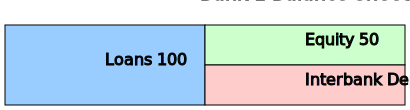

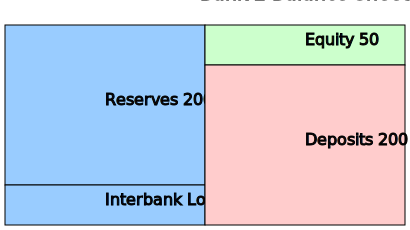

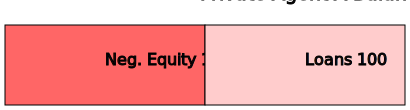

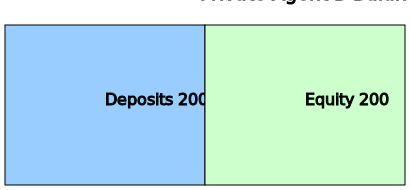

Total (Bank) Money: 200


In [4]:
bank1.book(debit=[('Loans',100)],credit=[('Equity',50),('Interbank Deposits',50)])
private_agentA.book(debit=[('Equity',100)],credit=[('Loans',100)])
bank2.book(debit=[('Reserves',200),('Interbank Loans',50)],credit=[('Equity',50),('Deposits',200)])
private_agentB.book(debit=[('Deposits',200)],credit=[('Equity',200)])
print_balance_sheets_and_money_stocks()

## Bank defaults
As already noted in [Example 3](http://www.siebenbrunner.com/moneycreation/Ex3_Refinancing.html), Bank 1 has a problem in this situation: it has a loan to a borrower who is completely insolvent. While we noted there that it usually takes some time before such losses are recognized and proceeded with the example, in this example we will consider the situation that arises when Bank 1 does indeed recognize this loss before the next transaction occurs. Note that for simplicity in this step we skip the step of creating a provision on the balance sheet and directly write off the loan on the balance sheet. This simplifies the presentation and has no impact on the results.

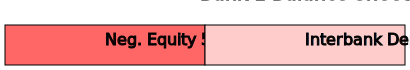

Total (Bank) Money: 200


In [5]:
bank1.book(debit=[('Impairments',100)],credit=[('Loans',100)])
print_balance_sheets_and_money_stocks("b1")

Bank 1 is now insolvent and unable to repay its loan to Bank 2. Bank 2 makes an impairment in the same fashion:

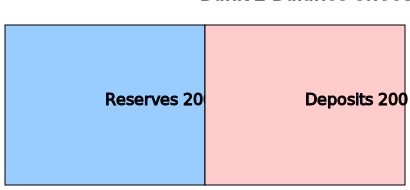

Total (Bank) Money: 200


In [6]:
bank2.book(debit=[('Impairments',50)],credit=[('Interbank Loans',50)])
print_balance_sheets_and_money_stocks("b2")

Bank 2 is now at the brink of insolvency. For the sake of the example we assume that it now faces a further loss, in the form of a payment that it has to make to Bank 3:

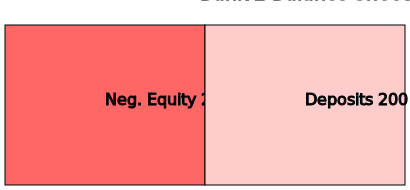

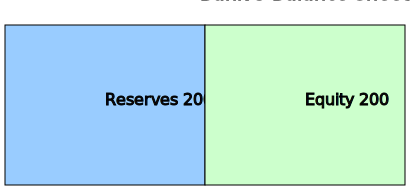

Total (Bank) Money: 200


In [7]:
bank2.book(debit=[('Expenses',200)],credit=[('Reserves',200)])
bank3.book(debit=[('Reserves',200)],credit=[('Income',200)])
print_balance_sheets_and_money_stocks("b2","b3")

Now private agent B is faced with the situation of holding a deposit at a bank that has no more assets. In reality, other mechanisms like a deposit insurance, a government bail-out or bank resolution tools would step in at this point. We only note that in the absence of such mechanisms, the depositor would have to write down its savings, wiping out its entire balance sheet in this case, and destroying the money stock.

In [8]:
private_agentB.book(debit=[('Impairments',200)],credit=[('Deposits',200)])
print_balance_sheets_and_money_stocks("pB")

Total (Bank) Money: 0


## Discussion
In this example we saw a cascade of defaults due to an intial insolvency of a bank. This is not the only way that a bank can fail, however. As discussed in [Example 3](http://www.siebenbrunner.com/moneycreation/Ex3_Refinancing.html), a bank may become illiquid if at any point it faces a situation where it is not possible to refinance a payment that it has to make. While under usual circumstances the central bank would always be available as a lender of last resort, there may be several reasons why in particular circumstances this may not be the case.

One reason for such a situation is that central banks usually require collateral in exchange for granting a loan. While a solvent bank will on paper always have enough assets to post as collateral, these may not be eligible by the rules of the central bank, or, even if they are eligible, the central bank may apply a haircut to these assets.

It should be noted that in practice, in a crisis situation, it may not be clear at all whether a bank is solvent at a given point in time. While the equity can always be computed from the book values of assets, there may be considerable uncertainty about the correct valuation of these assets. For this reason, it is generally entirely conceivable that a bank that is solvent on paper may no longer be able to refinance itself, if no one, including the central bank, is willing to lend against its assets with highly uncertaion valuations.